**Principal Component Analysis**
- algorithm commonly used for feature visualization
- lets you recude many features to just a few
- find one or more new axis to use fewer numbers to capture a combined feature
- 10, 50, 1000 features -> 2 or 3 features

**PCA Algorithm**

- preprocessing
    - features should be normaized to have zero mean
    - if x1 and x2 take on very different scales, perform feature scaling
- Choose an axis and project to selecetd axis -> this is called the **Principal Component**
    - variance should be large so lots of the information is captures (large spread of projected points)


- to get coordinat on the new axis, take the dot product between the coordinates and the length 1 vector

**PCA is not Linear Regression**
- unlabelled data and not trying to use x1 to predict x2 (y) -> algorithm treats them both equally
- instead of measuring vertical distance between the line, we are minimizing the perpendicular distance between point and line

**PCA in Code**
- Optional pre-processing: Perform feature scaling
1. "Fit" the data to obtain 2 or 3 new axes (principal components) for visualization (more axes can be used but not visualized) -> use **fit** method
2. Examine how much variance (information) is explained by each principal computnent -> use **explained_varaince_ratio** method (value tells you what percent of the variablity with the axis)
3. Transform (project) the data onto the new axis -> use **transform** method

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py

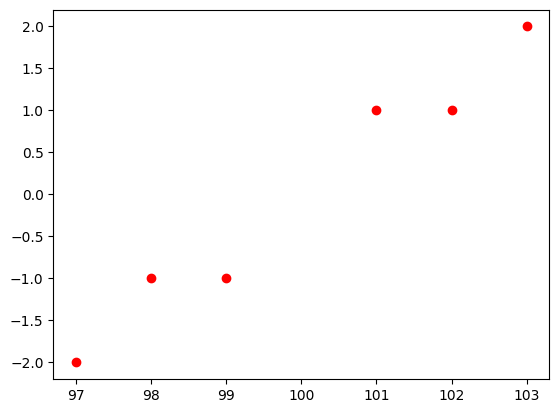

In [2]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

plt.plot(X[:,0], X[:,1], 'ro')

In [3]:
# Loading the PCA algorithm
pca_2 = PCA(n_components = 2)
pca_2

PCA(n_components=2)

In [4]:
# Let's fit the data. We do not need to scale it, since sklearn's implementation already handles it.
pca_2.fit(X)

PCA(n_components=2)

In [5]:
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

The coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance").  The second principal component adds an additional 0.76% of the information ("explained variance") that is not stored in the first principal component coordinates.

In [6]:
X_trans_2 = pca_2.transform(X)
X_trans_2

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

Think of column 1 as the coordinate along the first principal component (the first new axis) and column 2 as the coordinate along the second principal component (the second new axis).

You can probably just choose the first principal component since it retains 99% of the information (explained variance).

In [7]:
pca_1 = PCA(n_components = 1)
pca_1

PCA(n_components=1)

In [8]:
pca_1.fit(X)
pca_1.explained_variance_ratio_

array([0.99244289])

In [9]:
X_trans_1 = pca_1.transform(X)
X_trans_1

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

Notice how this column is just the first column of `X_trans_2`.


If you had 2 features (two columns of data) and choose 2 principal components, then you'll keep all the information and the data will end up the same as the original.

In [10]:
X_reduced_2 = pca_2.inverse_transform(X_trans_2)
X_reduced_2

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

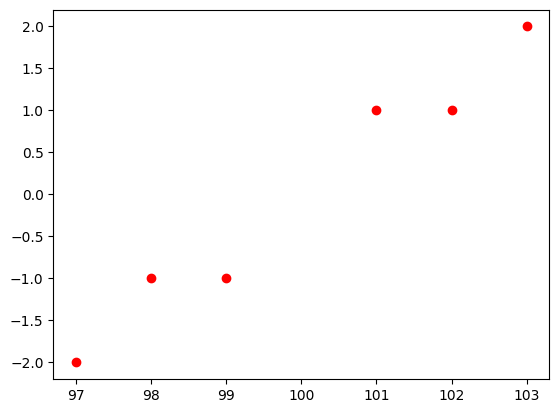

In [11]:
plt.plot(X_reduced_2[:,0], X_reduced_2[:, 1], 'ro')

In [12]:
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

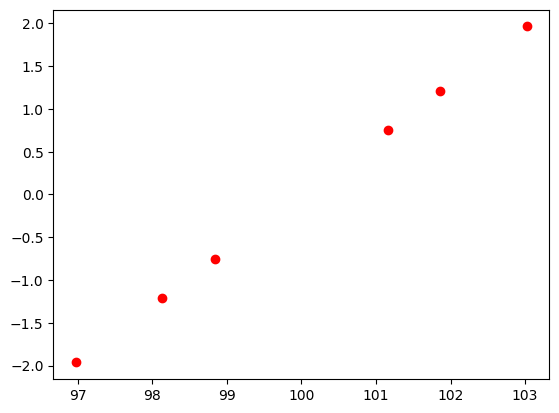

In [13]:
plt.plot(X_reduced_1[:, 0], X_reduced_1[:, 1], 'ro')

Notice how the data are now just on a single line (this line is the single principal component that was used to describe the data; and each example had a single "coordinate" along that axis to describe its location.

## Visualizing the PCA algorithm

Let's define $10$ points in the plane and use them as an example to visualize how we can compress this points in 1 dimension. You will see that there are good ways and bad ways.

In [14]:
X = np.array([[-0.83934975, -0.21160323],
       [ 0.67508491,  0.25113527],
       [-0.05495253,  0.36339613],
       [-0.57524042,  0.24450324],
       [ 0.58468572,  0.95337657],
       [ 0.5663363 ,  0.07555096],
       [-0.50228538, -0.65749982],
       [-0.14075593,  0.02713815],
       [ 0.2587186 , -0.26890678],
       [ 0.02775847, -0.77709049]])


In [15]:
p = figure(title = '10-point scatterplot', x_axis_label = 'x-axis', y_axis_label = 'y-axis') ## Creates the figure object
p.scatter(X[:,0],X[:,1],marker = 'o', color = '#C00000', size = 5) ## Add the scatter plot

## Some visual adjustments
p.grid.visible = False
p.grid.visible = False
p.outline_line_color = None 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.axis_line_color = "#f0f0f0"
p.xaxis.axis_line_width = 5
p.yaxis.axis_line_color = "#f0f0f0"
p.yaxis.axis_line_width = 5

## Shows the figure
show(p)